# Data loading
This is a tutorial on loading of protein benchmark datasets.

## Loading of protein benchmarks
Load the overview table of protein benchmark datasets using the default settings:

In [120]:
import aaanalysis as aa
df_info = aa.load_dataset()
df_info.iloc[:, :7].head(13)

,Level,Dataset,# Sequences,# Amino acids,# Positives,# Negatives,Predictor
0,Amino acid,AA_CASPASE3,233,185605,705,184900,PROSPERous
1,Amino acid,AA_FURIN,71,59003,163,58840,PROSPERous
2,Amino acid,AA_LDR,342,118248,35469,82779,IDP-Seq2Seq
3,Amino acid,AA_MMP2,573,312976,2416,310560,PROSPERous
4,Amino acid,AA_RNABIND,221,55001,6492,48509,GMKSVM-RU
5,Amino acid,AA_SA,233,185605,101082,84523,PROSPERous
6,Sequence,SEQ_AMYLO,1414,8484,511,903,ReRF-Pred
7,Sequence,SEQ_CAPSID,7935,3364680,3864,4071,VIRALpro
8,Sequence,SEQ_DISULFIDE,2547,614470,897,1650,Dipro
9,Sequence,SEQ_LOCATION,1835,732398,1045,790,NaN


The benchmark datasets are categorized into amino acid ('AA'), domain ('DOM'), and sequence ('SEQ') level datasets, indicated by their `name` prefix, as exemplified here.

In [121]:
df_seq1 = aa.load_dataset(name="AA_CASPASE3")
df_seq2 = aa.load_dataset(name="SEQ_CAPSID")
df_seq3 = aa.load_dataset(name="DOM_GSEC")
df_seq2.head(2)
# Compare columns of three types

,entry,sequence,label
0,CAPSID_1,MVTHNVKINKHVTRRSYSSAKEVLEIPPLTEVQTASYKWFMDKGIK...,0
1,CAPSID_2,MKKRQKKMTLSNFTDTSFQDFVSAEQVDDKSAMALINRAEDFKAGQ...,0


Each dataset can be utilized for a binary classification, with labels being positive (1) or negative (0). A balanced number of samples can be chosen by the `n` parameter, defining the sample number per class.  

In [122]:
df_seq = aa.load_dataset(name="SEQ_CAPSID", n=100)
# Returns 200 samples, 100 positives and 100 negatives
df_seq["label"].value_counts()

label
0    100
1    100
Name: count, dtype: int64

Or randomly selected using `random=True`:

In [123]:
df_seq = aa.load_dataset(name="SEQ_CAPSID", n=100, random=True)

The protein sequences can have varying length:

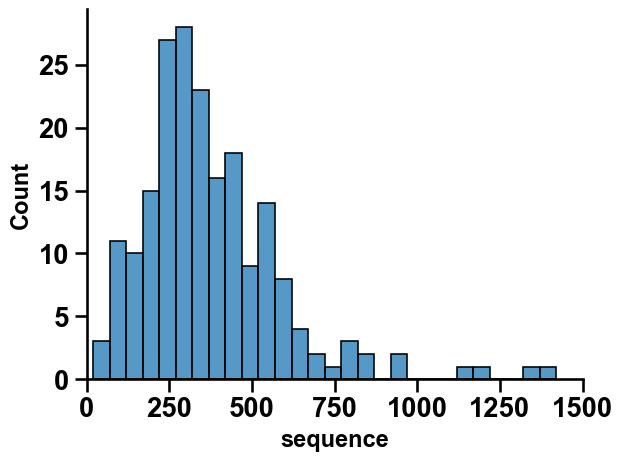

In [135]:
# Plot distribution
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
# Utility AAanalysis function for publication ready plots
aa.plot_settings(font_scale=1.2) 
df_seq = aa.load_dataset(name="SEQ_CAPSID", n=100)
list_seq_lens = df_seq["sequence"].apply(len)
sns.histplot(list_seq_lens, binwidth=50)
sns.despine()
plt.xlim(0, 1500)
plt.show()

Which can be easily filtered using `min_len` and `max_len` parameters:

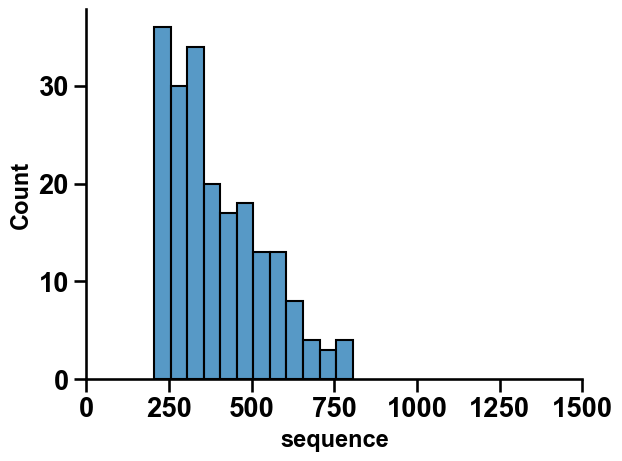

In [136]:
df_seq = aa.load_dataset(name="SEQ_CAPSID", n=100, min_len=200, max_len=800)
list_seq_lens = df_seq["sequence"].apply(len)
aa.plot_settings(font_scale=1.2)  # Utility AAanalysis function for publication ready plots
sns.histplot(list_seq_lens, binwidth=50)
sns.despine()
plt.xlim(0, 1500)
plt.show()

## Loading of protein benchmarks: Amino acid window size
For amino acid level datasets, labels are provided for each residue position, which can be seen by setting `aa_window_size=None`:

In [126]:
df_seq = aa.load_dataset(name="AA_CASPASE3", aa_window_size=None)
df_seq.head(4)

,entry,sequence,label
0,CASPASE3_1,MSLFDLFRGFFGFPGPRSHRDPFFGGMTRDEDDDEEEEEEGGSWGR...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,CASPASE3_2,MEVTGDAGVPESGEIRTLKPCLLRRNYSREQHGVAASCLEDLRSKA...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
2,CASPASE3_3,MRARSGARGALLLALLLCWDPTPSLAGIDSGGQALPDSFPSAPAEQ...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,CASPASE3_4,MDAKARNCLLQHREALEKDIKTSYIMDHMISDGFLTISEEEKVRNE...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


For convenience, we provide an "amino acid window" of length n. This window represents a specific amino acid, which is flanked by (n-1)/2 residues on both its N-terminal and C-terminal sides. It's essential for n to be odd, ensuring equal residues on both sides. While the default window size is 9, sizes between 5 and 15 are also popular.

In [127]:
df_seq = aa.load_dataset(name="AA_CASPASE3")
df_seq.head(4)

,entry,sequence,label
0,CASPASE3_1_pos4,MSLFDLFRG,0
1,CASPASE3_1_pos5,SLFDLFRGF,0
2,CASPASE3_1_pos6,LFDLFRGFF,0
3,CASPASE3_1_pos7,FDLFRGFFG,0


Sequences can be pre-filtered using `min_len` and `max_len` and `n` residues can be randomly selected by `random` with different `aa_window_size`s.

In [128]:
df_seq = aa.load_dataset(name="AA_CASPASE3", min_len=20, n=3, random=True, aa_window_size=21)
df_seq

,entry,sequence,label
0,CASPASE3_55_pos170,KKRKLEEEEDGKLKKPKNKDK,1
1,CASPASE3_29_pos185,CPHHERCSDSDGLAPPQHLIR,1
2,CASPASE3_64_pos431,DNPLNWPDEKDSSFYRNFGST,1
3,CASPASE3_93_pos455,FVKNMNRDSTFIVNKTITAEV,0
4,CASPASE3_38_pos129,SSFDLDYDFQRDYYDRMYSYP,0
5,CASPASE3_8_pos33,RPPQLRPGAPTSLQTEPQGNP,0


## Loading of protein benchmarks: Positive-Unlabeled (PU) datasets
In typical binary classification, data is labeled as positive (1) or negative (0). But with many protein sequence datasets, we face challenges: they might be small, unbalanced, or lack a clear negative class. For datasets with only positive and unlabeled samples (2), we use PU learning. This approach identifies reliable negatives from the unlabeled data to make binary classification possible. We offer benchmark datasets for this scenario, denoted by the `_PU` suffix. For example, the `DOM_GSEC_PU` dataset corresponds to the `DOM_GSEC set`.

In [129]:
df_seq = aa.load_dataset(name="DOM_GSEC")
df_seq

,entry,sequence,label,tmd_start,tmd_stop,jmd_n,tmd,jmd_c
0,P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,1,701,723,FAEDVGSNKG,AIIGLMVGGVVIATVIVITLVML,KKKQYTSIHH
1,P14925,MAGRARSGLLLLLLGLLALQSSCLAFRSPLSVFKRFKETTRSFSNE...,1,868,890,KLSTEPGSGV,SVVLITTLLVIPVLVLLAIVMFI,RWKKSRAFGD
2,P70180,MRSLLLFTFSACVLLARVLLAGGASSGAGDTRPGSRRRAREALAAQ...,1,477,499,PCKSSGGLEE,SAVTGIVVGALLGAGLLMAFYFF,RKKYRITIER
3,Q03157,MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...,1,585,607,APSGTGVSRE,ALSGLLIMGAGGGSLIVLSLLLL,RKKKPYGTIS
4,Q06481,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...,1,694,716,LREDFSLSSS,ALIGLLVIAVAIATVIVISLVML,RKRQYGTISH
...,...,...,...,...,...,...,...,...
121,P36941,MLLPWATSAPGLAWGPLVLGLFGLLAASQPQAVPPYASENQTCRDQ...,0,226,248,PLPPEMSGTM,LMLAVLLPLAFFLLLATVFSCIW,KSHPSLCRKL
122,P25446,MLWIWAVLPLVLAGSQLRVHTQGTNSISESLKLRRRVRETDKNCSE...,0,170,187,NCRKQSPRNR,LWLLTILVLLIPLVFIYR,KYRKRKCWKR
123,Q9P2J2,MVWCLGLAVLSLVISQGADGRGKPEVVSVVGRAGESVVLGCDLLPP...,0,738,760,PGLLPQPVLA,GVVGGVCFLGVAVLVSILAGCLL,NRRRAARRRR
124,Q96J42,MVPAAGRRPPRVMRLLGWWQVLLWVLGLPVRGVEVAEESGRLWSEE...,0,324,342,LPSTLIKSVD,WLLVFSLFFLISFIMYATI,RTESIRWLIP


In [130]:
df_seq_pu = aa.load_dataset(name="DOM_GSEC_PU")
df_seq_pu

,entry,sequence,label,tmd_start,tmd_stop,jmd_n,tmd,jmd_c
0,P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,1,701,723,FAEDVGSNKG,AIIGLMVGGVVIATVIVITLVML,KKKQYTSIHH
1,P14925,MAGRARSGLLLLLLGLLALQSSCLAFRSPLSVFKRFKETTRSFSNE...,1,868,890,KLSTEPGSGV,SVVLITTLLVIPVLVLLAIVMFI,RWKKSRAFGD
2,P70180,MRSLLLFTFSACVLLARVLLAGGASSGAGDTRPGSRRRAREALAAQ...,1,477,499,PCKSSGGLEE,SAVTGIVVGALLGAGLLMAFYFF,RKKYRITIER
3,Q03157,MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...,1,585,607,APSGTGVSRE,ALSGLLIMGAGGGSLIVLSLLLL,RKKKPYGTIS
4,Q06481,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...,1,694,716,LREDFSLSSS,ALIGLLVIAVAIATVIVISLVML,RKRQYGTISH
...,...,...,...,...,...,...,...,...
689,P60852,MAGGSATTWGYPVALLLLVATLGLGRWLQPDPGLPGLRHSYDCGIK...,2,602,624,DSNGNSSLRP,LLWAVLLLPAVALVLGFGVFVGL,SQTWAQKLWE
690,P20239,MARWQRKASVSSPCGRSIYRFLSLLFTLVTSVNSVSLPQSENPAFP...,2,684,703,IIAKDIASKT,LGAVAALVGSAVILGFICYL,YKKRTIRFNH
691,P21754,MELSYRLFICLLLWGSTELCYPQPLWLLQGGASHPETSVQPVLVEC...,2,387,409,EQWALPSDTS,VVLLGVGLAVVVSLTLTAVILVL,TRRCRTASHP
692,Q12836,MWLLRCVLLCVSLSLAVSGQHKPEAPDYSSVLHCGPWSFQFAVNLN...,2,506,528,EKLRVPVDSK,VLWVAGLSGTLILGALLVSYLAV,KKQKSCPDQM
